In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.datasets import mnist
import matplotlib.pyplot as plt


## Import Dataset

In [ ]:
#import data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
#Look at the shape of our data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
X_train[0]

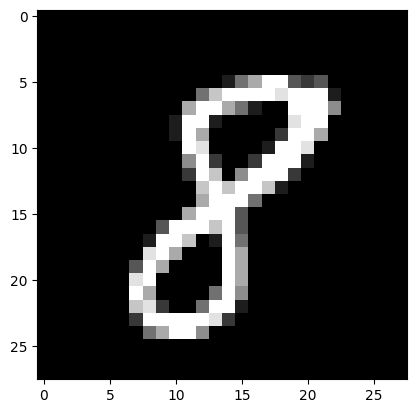

In [16]:
#lets pick  random image to display
random_num = np.random.randint(0, 60000)

#visualize using imshow()
plt.imshow(X_train[random_num], cmap="gray")

[False  True False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False  True ... False False False]
[ True False False ...  True False False]
[False False False ... False  True False]
[False False False ... False False False]
[False False False ... False False  True]
[False False False ... False False False]


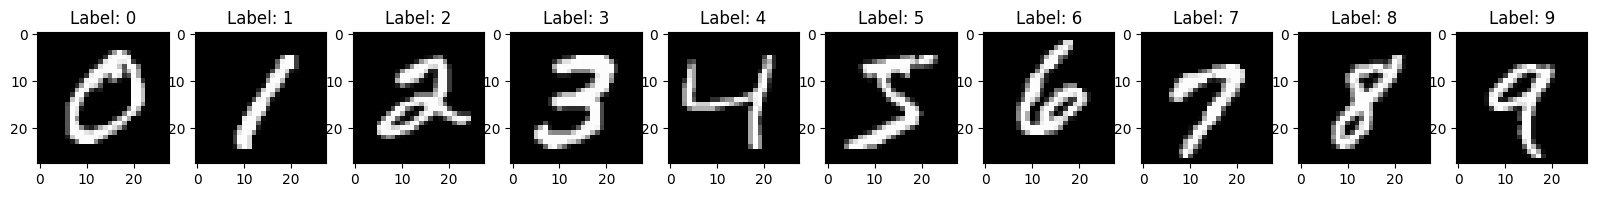

In [ ]:
#visualize one example per each digit
#using a for loop and matplotlib
num_classes = 10

#create a subplot
fig, ax = plt.subplots(1, num_classes, figsize=(20, 20))

for i in range(num_classes):
    sample = X_train[y_train==i][0]
    ax[i].imshow(sample, cmap="gray")
    ax[i].set_title(f"Label: {i}")
